## Homework

### Подготовка

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

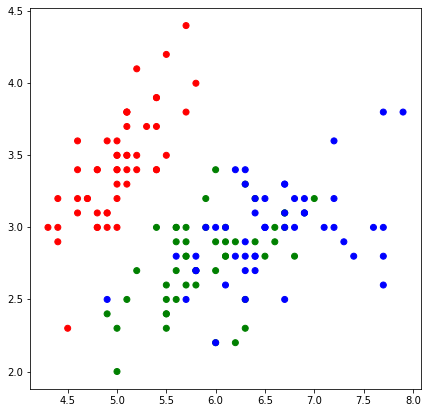

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [5]:
def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)

In [6]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [33]:
def get_graph(X_train, y_train, k, weights='uniform'):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, weights)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

### 1. К алгоритму kNN, представленному на уроке, реализуйте добавление весов для соседей по любому из показанных на уроке принципов. Сравните точность нового алгоритма с исходным при разных значениях k.

In [46]:
def knn(x_train, y_train, x_test, k, weights='uniform'):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # отберем k ближайших соседей
        k_neighbours = sorted(test_distances)[0:k]
                
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        if weights == 'uniform':
            for d in k_neighbours:
                classes[d[1]] += 1 # равновзвешенный алгоритм
        elif weights == 'distance':
            for d in k_neighbours:
                classes[d[1]] += 1 / (d[0] + 1) # вес каждого соседа обратно пропорционален расстоянию до него
        elif weights == 'index':
            for idx, d in enumerate(k_neighbours, 1):
                classes[d[1]] += 1 / idx # вес каждого соседа обратно пропорционален его индексу (минимальный индекс = 1)
        else:
            raise TypeError('Weights can be only uniform, distance or index')
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

### Проверим работу алгоритма для разных k

In [43]:
for k in range(1, 11):
    y_pred = knn(X_train, y_train, X_test, k, weights='uniform')
    print(f'Точность работы алгоритма при k = {k}, тип взвешивания = "uniform": {accuracy(y_pred, y_test):.3f}')
    y_pred = knn(X_train, y_train, X_test, k, weights='distance')
    print(f'Точность работы алгоритма при k = {k}, тип взвешивания = "distance": {accuracy(y_pred, y_test):.3f}')
    y_pred = knn(X_train, y_train, X_test, k, weights='index')
    print(f'Точность работы алгоритма при k = {k}, тип взвешивания = "index": {accuracy(y_pred, y_test):.3f}\n')

Точность работы алгоритма при k = 1, тип взвешивания = "uniform": 0.667
Точность работы алгоритма при k = 1, тип взвешивания = "distance": 0.667
Точность работы алгоритма при k = 1, тип взвешивания = "index": 0.667

Точность работы алгоритма при k = 2, тип взвешивания = "uniform": 0.667
Точность работы алгоритма при k = 2, тип взвешивания = "distance": 0.733
Точность работы алгоритма при k = 2, тип взвешивания = "index": 0.667

Точность работы алгоритма при k = 3, тип взвешивания = "uniform": 0.733
Точность работы алгоритма при k = 3, тип взвешивания = "distance": 0.733
Точность работы алгоритма при k = 3, тип взвешивания = "index": 0.667

Точность работы алгоритма при k = 4, тип взвешивания = "uniform": 0.833
Точность работы алгоритма при k = 4, тип взвешивания = "distance": 0.767
Точность работы алгоритма при k = 4, тип взвешивания = "index": 0.733

Точность работы алгоритма при k = 5, тип взвешивания = "uniform": 0.867
Точность работы алгоритма при k = 5, тип взвешивания = "distance

Наилучшая точность для всех трех алгоритмов при k = 9 (хотя если не учитывать взвешивание по индексу, то более простым и эффективным будет решение с k = 5). Тип взвешивания по расстоянию практически везде показывает результаты лучше, либо такие же как базовый алгоритм, взвешивание по индексу самое неэффективное. Изобразим на графике решения с k = 9.

<ipython-input-33-4630e9e37d2e>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


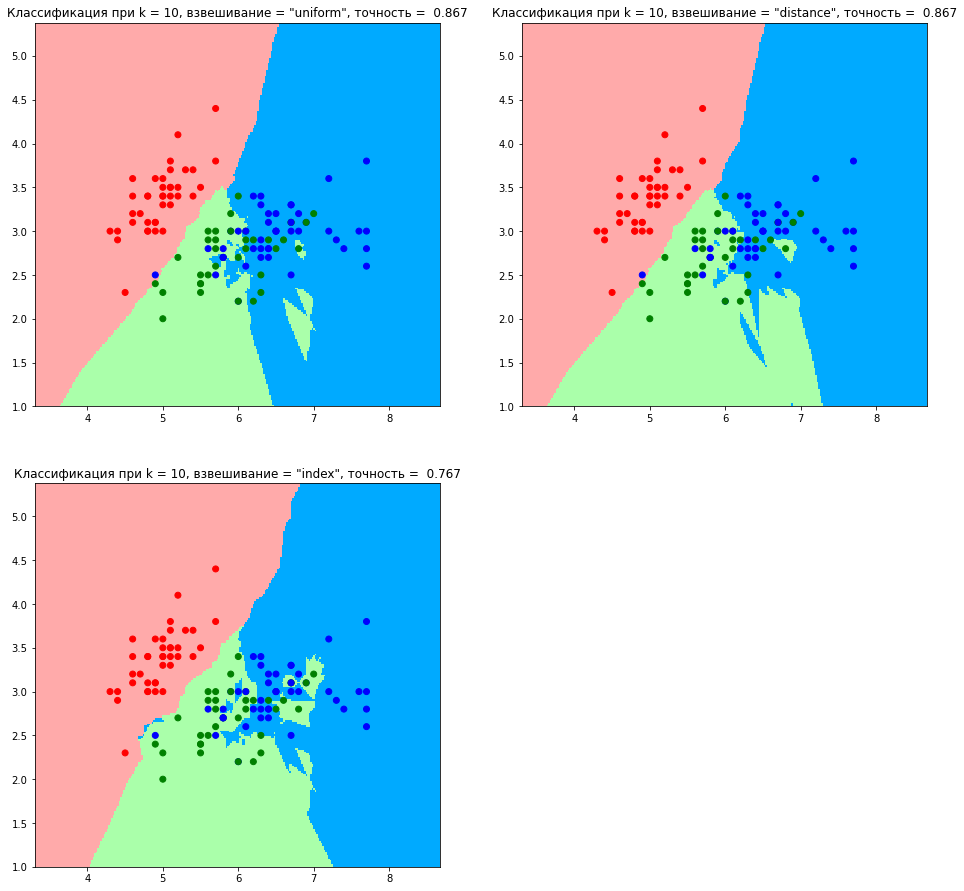

In [47]:
plt.figure(figsize = (16, 24))
plt.subplot(3, 2, 1)
y_pred = knn(X_train, y_train, X_test, 9, weights='uniform')
plt.title(f'Классификация при k = {k}, взвешивание = "uniform", точность =  {accuracy(y_pred, y_test):.3f}')
get_graph(X_train, y_train, k, weights='uniform')
plt.subplot(3, 2, 2)
y_pred = knn(X_train, y_train, X_test, 9, weights='distance')
plt.title(f'Классификация при k = {k}, взвешивание = "distance", точность =  {accuracy(y_pred, y_test):.3f}')
get_graph(X_train, y_train, k, weights='distance')
plt.subplot(3, 2, 3)
y_pred = knn(X_train, y_train, X_test, 9, weights='index')
plt.title(f'Классификация при k = {k}, взвешивание = "index", точность =  {accuracy(y_pred, y_test):.3f}')
get_graph(X_train, y_train, k, weights='index')

### 2. (*) Напишите функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и постройте график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [48]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

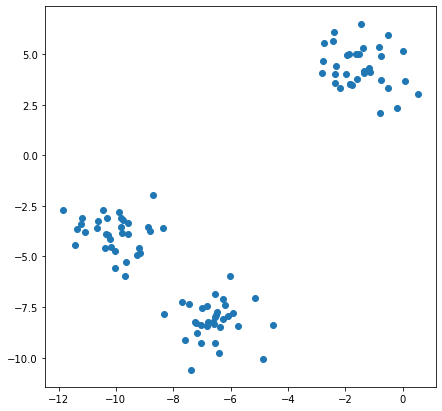

In [49]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

In [248]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
            
        # добавлено, потому что одни и те же точки добавлялись в словарь по несколько раз
        classes = {i: [] for i in range(k)}
        distances = []
    
    return old_centroids, classes

In [51]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

In [235]:
# функция расчета среднего квадратичного внутрикластерного расстояния
def inertia(centroids, clusters):
    clusters_distances = []
    for idx, cluster in enumerate(clusters):
        clusters_distances.append(sum([e_metrics(x, centroids[idx])**2 for x in clusters[cluster]]))
    return sum(clusters_distances)

In [249]:
# определим максимальное количество итераций
max_iterations = 8
# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4
inertia_list =[]

for k in range(1, 11):
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    inertia_list.append(inertia(centroids, clusters))
inertia_list

[4118.1537777044705,
 661.5698490972002,
 156.2828925117,
 139.37411461368376,
 126.57537841891627,
 115.81301084904369,
 101.33706078363485,
 98.00829163101346,
 72.88769594879396,
 58.46251834933362]

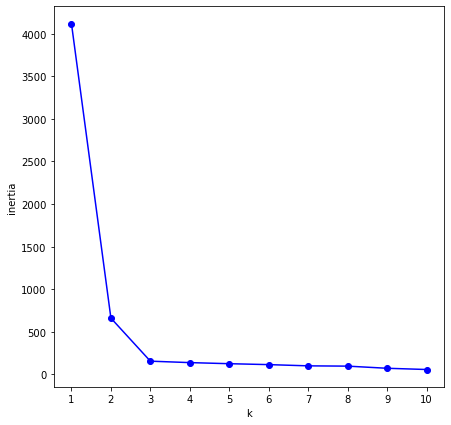

In [247]:
plt.figure(figsize=(7,7))
plt.xticks(np.arange(0, 11, step=1))
plt.xlabel('k')
plt.ylabel('inertia')
plt.plot(list(range(1, 11)), inertia_list, marker='o', c='b')

**Видим, что оптимальным является количество кластеров = 3**

In [153]:
# проверяем
from sklearn.cluster import KMeans
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    print(f'k={k}, inertia = {kmeans.inertia_}')

k=1, inertia = 4118.153777704471
k=2, inertia = 661.5698490972003
k=3, inertia = 156.28289251170003
k=4, inertia = 130.96121900774804
k=5, inertia = 112.25760818234751
k=6, inertia = 96.55668372062839
k=7, inertia = 82.33258394290048
k=8, inertia = 69.70669902233493
k=9, inertia = 61.17881573247302
k=10, inertia = 55.17521061126237


**Результат на k >= 4 начинает немного расходиться, что может быть связано с особенностями работы алгоритма**